In [ ]:
# 1. Importación de librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

sns.set(style="whitegrid")

# 2. Carga del dataset

print("🔄 Cargando dataset...")
df = pd.read_csv("D:\RENATO\Desktop\data\peru_student_enrollment_data_2023.csv", sep=";")
print("✅ Datos cargados correctamente. Dimensiones:", df.shape)

<>:16: SyntaxWarning: invalid escape sequence '\R'
<>:16: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Renato\AppData\Local\Temp\ipykernel_9156\3156534755.py:16: SyntaxWarning: invalid escape sequence '\R'
  df = pd.read_csv("D:\RENATO\Desktop\data\peru_student_enrollment_data_2023.csv", sep=";")


🔄 Cargando dataset...
✅ Datos cargados correctamente. Dimensiones: (37582, 21)


In [ ]:
# 3. Limpieza de datos

print("🧹 Limpiando datos...")

# Llenar vacíos comunes
df.fillna("NO ESPECIFICADO", inplace=True)

# Convertir columnas de pago a numérico
df["TUITION PAYMENT MARCH 2022"] = df["TUITION PAYMENT MARCH 2022"].astype(int)
df["TUITION PAYMENT MARCH 2023"] = df["TUITION PAYMENT MARCH 2023"].astype(int)

# Columna binaria para si pagó o no en marzo 2023
df["PAGO_2023"] = df["TUITION PAYMENT MARCH 2023"]

# Columna binaria para riesgo académico
df["EN_RIESGO"] = df["AT-RISK COURSE"].apply(lambda x: 1 if str(x).strip() != "0" else 0)

# Extraer edad media desde el rango
df["EDAD_MEDIA"] = df["AGE RANGE OF ENROLLED STUDENT"].str.extract(r"(\d+)\.?\s*").astype(float)
df["EDAD_MEDIA"] = df["EDAD_MEDIA"].fillna(df["EDAD_MEDIA"].median())

print("✅ Limpieza completada.")


🧹 Limpiando datos...
✅ Limpieza completada.


In [ ]:
# 4. Análisis exploratorio (EDA)

print("\n📊 Explorando los datos...")

print("\nGénero:")
print(df["GENDER"].value_counts())

print("\nFacultades más comunes:")
print(df["FACULTY"].value_counts().head(5))

print("\n% Estudiantes en riesgo académico:")
print(df["EN_RIESGO"].value_counts(normalize=True) * 100)



📊 Explorando los datos...

Género:
GENDER
M                  21061
F                  16149
U                    201
2                    102
1                     67
NO ESPECIFICADO        2
Name: count, dtype: int64

Facultades más comunes:
FACULTY
Fac. Ing. Ind. Y Mec.             12639
Fac. Ing. Sist. Y Elect.           6480
Fac. Adm. Y Neg.                   5868
Fac. Der. Cienc. Polit. Y RRII     5445
Fac. Hum y CC Soc                  3581
Name: count, dtype: int64

% Estudiantes en riesgo académico:
EN_RIESGO
0    90.242669
1     9.757331
Name: proportion, dtype: float64


📈 Generando gráficos...


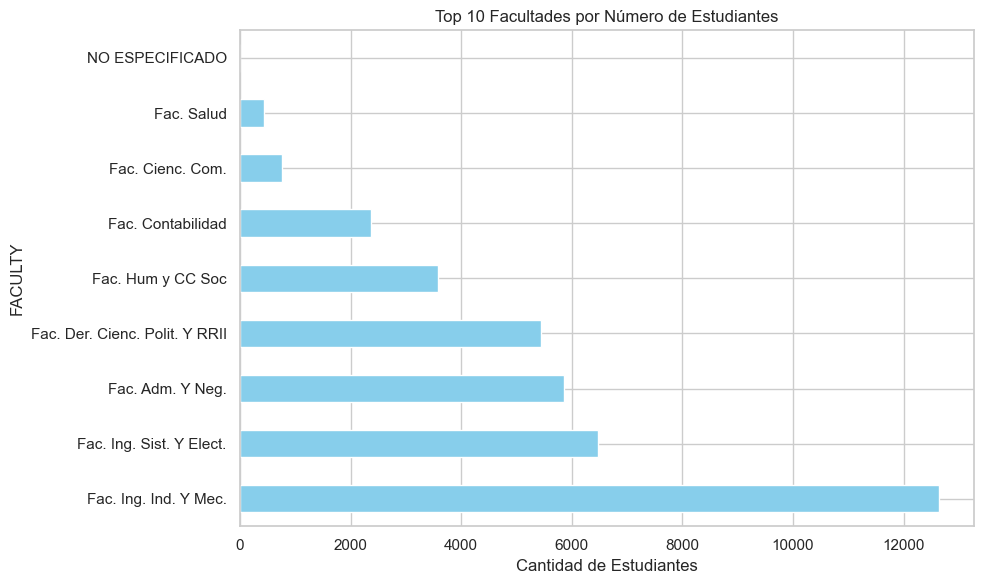

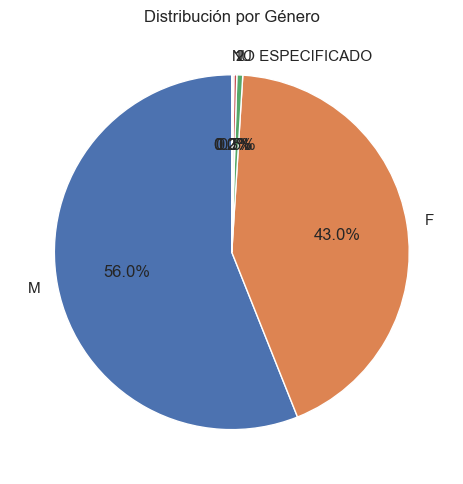

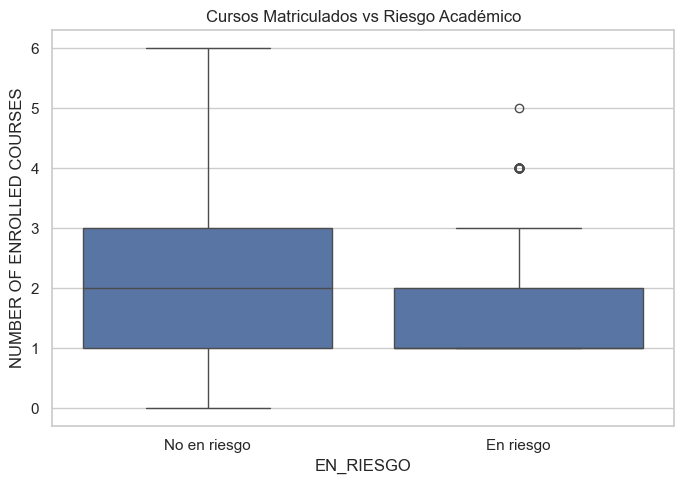

✅ Gráficos guardados.


In [ ]:

# 5. Visualizaciones

print("📈 Generando gráficos...")

# Gráfico 1: Facultades con más alumnos
plt.figure(figsize=(10, 6))
df["FACULTY"].value_counts().head(10).plot(kind="barh", color="skyblue")
plt.title("Top 10 Facultades por Número de Estudiantes")
plt.xlabel("Cantidad de Estudiantes")
plt.tight_layout()
plt.savefig("facultades_top10.png")
plt.show()

# Gráfico 2: Género
plt.figure(figsize=(5, 5))
df["GENDER"].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.title("Distribución por Género")
plt.ylabel("")
plt.tight_layout()
plt.savefig("genero_piechart.png")
plt.show()

# Gráfico 3: Boxplot de riesgo vs cursos
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="EN_RIESGO", y="NUMBER OF ENROLLED COURSES")
plt.title("Cursos Matriculados vs Riesgo Académico")
plt.xticks([0, 1], ["No en riesgo", "En riesgo"])
plt.tight_layout()
plt.savefig("riesgo_cursos.png")
plt.show()

print("✅ Gráficos guardados.")


In [ ]:

# 6. Preparación para el modelo

print(" Preparando modelo de predicción...")

features = ["GENDER", "SHIFT/SCHEDULE", "BENEFIT DISCOUNTS", "STUDY MODE", "INSTITUTION STATUS"]
X = pd.get_dummies(df[features], drop_first=True)
X["EDAD_MEDIA"] = df["EDAD_MEDIA"]
y = df["EN_RIESGO"]

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

🤖 Preparando modelo de predicción...


In [ ]:

# 7. Entrenamiento del modelo

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


# 8. Evaluación del modelo

print("\n📈 Resultados del modelo:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))



📈 Resultados del modelo:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     10118
           1       0.00      0.00      0.00      1157

    accuracy                           0.90     11275
   macro avg       0.45      0.50      0.47     11275
weighted avg       0.81      0.90      0.85     11275

Matriz de confusión:
[[10115     3]
 [ 1157     0]]
